# this is the beginnig

### Set Variables

In [1]:
SBJ = 'IR35'
an_id = 'fooof_main_ft_Dx_gROI_wn4k_f1to30'

## Import and Set Up

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#import mne
#import h5py
from scipy.io import loadmat, savemat

# Temporary path BS to add FOOOF module to path
import os
import sys
#from subprocess import call
#sys.path.append('/home/knight/hoycw/Apps/fooof/')

from fooof import FOOOFGroup, FOOOF
#import pandas as pd
#import seaborn as sns


In [3]:
if os.path.isdir('/Volumes/hoycw_clust/'):
    root_dir = '/Volumes/hoycw_clust/'
elif os.path.isdir('/home/knight/hoycw/'):
    root_dir = '/home/knight/hoycw/'

SBJ_data_dir = root_dir+'PRJ_Stroop/data/' + SBJ + '/02_preproc/'
psd_fname = SBJ_data_dir + SBJ + '_' + an_id + '_PSDs.mat'

## Load Data

In [4]:
# Load Data
all_data = loadmat(psd_fname)
# Numeric
freqs = np.squeeze(all_data['freqs']).astype('float')
psds  = np.squeeze(all_data['psds']).astype('float')
foi   = np.squeeze(all_data['foi']).astype('int')
pk_bw_lim = np.squeeze(all_data['pk_bw_lim']).astype(float)
mn_pk_amp = np.squeeze(all_data['mn_pk_amp']).astype(float)
max_n_pks = np.squeeze(all_data['max_n_pks']).astype(int)
# String
atlas_id = all_data['atlas_id'][0]
roi_id = all_data['roi_id'][0]
# Cell of strings
label_array = all_data['labels']
labels = [str(''.join(letter)) for letter_array in label_array for letter in letter_array]
roi_array = all_data['rois']
rois = [str(''.join(letter)) for letter_array in roi_array for letter in letter_array]

In [5]:
all_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Mon Nov 12 15:45:43 2018',
 '__version__': '1.0',
 '__globals__': [],
 'atlas_id': array(['Dx'], dtype='<U2'),
 'roi_id': array(['gROI'], dtype='<U4'),
 'freqs': array([[0.00000000e+00],
        [2.44140625e-01],
        [4.88281250e-01],
        ...,
        [4.99511719e+02],
        [4.99755859e+02],
        [5.00000000e+02]]),
 'psds': array([[5.96861188e-02, 1.25732690e+01, 1.74847512e+02, ...,
         4.98923446e-06, 4.98922562e-06, 2.49461134e-06],
        [2.85784458e-02, 3.86061004e+00, 5.79599545e+01, ...,
         3.41294499e-06, 3.41293897e-06, 1.70646848e-06],
        [4.40743083e-02, 6.83486364e+00, 1.02734486e+02, ...,
         6.00656370e-06, 6.00655308e-06, 3.00327477e-06],
        ...,
        [2.89540439e-02, 4.78970012e+00, 6.84059430e+01, ...,
         4.33804385e-06, 4.33803606e-06, 2.16901673e-06],
        [1.32900276e-02, 2.74814105e+00, 3.80094694e+01, ...,
         2.59136813e-06, 2.59136351e-

## Run FOOOF

In [7]:
FOOOFGroup?

                                                                                                  
                                       FOOOF - GROUP RESULTS                                      
                                                                                                  
                             Number of power spectra in the Group: 37                             
                                                                                                  
                        The model was run on the frequency range 1 - 50 Hz                        
                                 Frequency Resolution is 0.24 Hz                                  
                                                                                                  
                               Power spectra were fit with a knee.                                
                                                                                                  
          

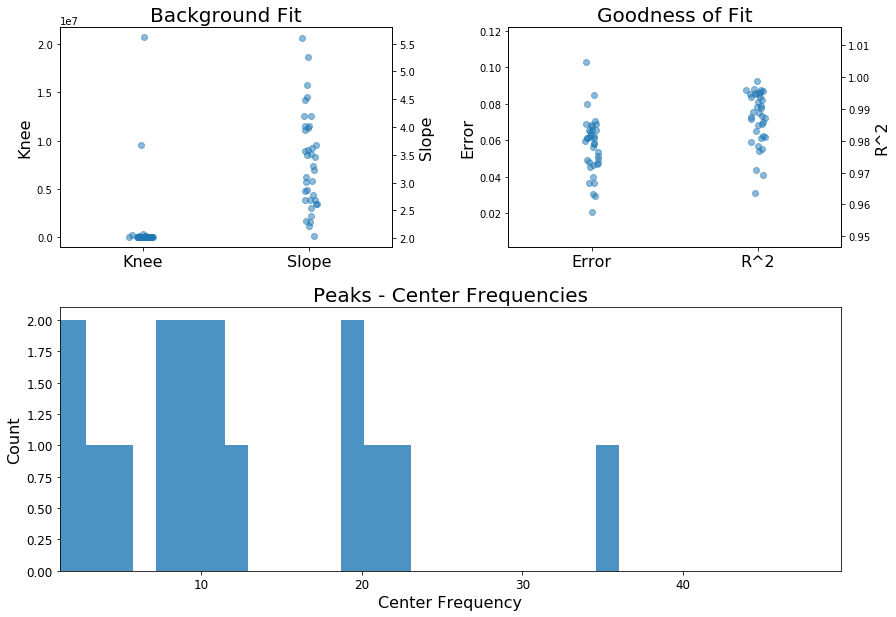

In [8]:
fg = FOOOFGroup(peak_width_limits=(pk_bw_lim[0], pk_bw_lim[1]),\
                max_n_peaks=max_n_pks, min_peak_amplitude=mn_pk_amp, background_mode='knee')
fg.report(freqs, psds, [1, 50])
# roi_fg = {}
# for roi in np.unique(rois):
#     roi_fg[roi] = FOOOFGroup()
#     roi_idx = [i for i, r in enumerate(rois) if r == roi]
#     roi_fg[roi].fit(freqs, psds[roi_idx], list(foi))

## Plot Individual Electrodes

(array([1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 2., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.]),
 array([0.29293087, 0.29811048, 0.30329009, 0.3084697 , 0.31364931,
        0.31882892, 0.32400853, 0.32918814, 0.33436775, 0.33954736,
        0.34472697, 0.34990658, 0.35508619, 0.3602658 , 0.36544541,
        0.37062502, 0.37580464, 0.38098425, 0.38616386, 0.39134347,
        0.39652308, 0.40170269, 0.4068823 , 0.41206191, 0.41724152,
        0.42242113, 0.42760074, 0.43278035, 0.43795996, 0.44313957]),
 <a list of 29 Patch objects>)

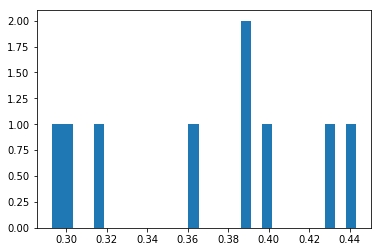

In [9]:
amp = fg.get_all_data('peak_params','Amp')
plt.hist(amp[:,0],bins=np.linspace(np.min(amp[:,0]),np.max(amp[:,0]),num=30))

(array([ 1.,  5.,  6.,  5.,  2.,  3.,  2.,  1.,  2., 34.]),
 array([ 2.47862407,  3.43076166,  4.38289926,  5.33503685,  6.28717444,
         7.23931204,  8.19144963,  9.14358722, 10.09572481, 11.04786241,
        12.        ]),
 <a list of 10 Patch objects>)

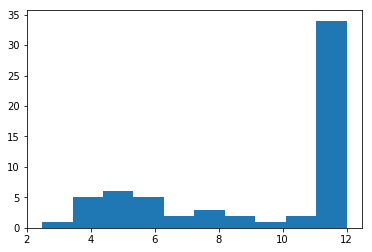

In [7]:
bw = fg.get_all_data('peak_params','BW')
plt.hist(bw[:,0])

In [11]:
fm.save_report?

In [12]:
SBJ_fooof_dir = SBJ_data_dir + an_id + '_results_knee_log/'
if not os.path.exists(SBJ_fooof_dir):
    os.makedirs(SBJ_fooof_dir)
fg.save_report(file_name=SBJ+'_'+an_id+'_group_results', file_path=SBJ_fooof_dir)
for e in range(len(labels)):
    fm = fg.get_fooof(e, regenerate=True)
    fm.save_report(file_name=labels[e], file_path=SBJ_fooof_dir, plt_log=True)

In [9]:
print('LPFC')
roi_fg['LPFC'].plot()

LPFC


NameError: name 'roi_fg' is not defined

In [10]:
# Save out a specific FOOOF measure of interest - for example, slopes
cf = fg.get_all_data('peak_params', 'CF')
bw = fg.get_all_data('peak_params', 'BW')


In [16]:
# Extract FOOOF results from object
fooof_results = fg.get_results()

# Convert FOOOF results to a dictionary
#  This is useful for saving out as a mat file
fooof_results_dict = fooof_results._asdict()

AttributeError: 'list' object has no attribute '_asdict'

In [ ]:
# Extract all fits that are above some error threshold, for further examination. 
#  You could also do a similar analysis for particularly low errors
to_check = []
for ind, res in enumerate(fg):
    if res.error > 0.010:
        to_check.append(fg.get_fooof(ind, regenerate=True))

# A more condensed version of the procedure above can also be used, like this:
#to_check = [fg.get_fooof(ind, True) for ind, res in enumerate(fg) if res.error > 0.010]

In [ ]:
# Loop through the problem fits, checking the plots, and saving out reports, to check later. 
for ind, fm in enumerate(to_check):
    fm.plot()
    fm.save_report('Report_ToCheck_#' + str(ind))

## FOOOF Analysis

In [33]:
from fooof.analysis import get_band_peak, get_band_peak_group
# Check out the documentation for the peak analyis helper function
get_band_peak?

In [ ]:
# Set up indexes for accessing data, for convenience
cf_ind, am_ind, bw_ind = 0, 1, 2
# Define frequency bands of interest
theta_band = [4, 8]
alpha_band = [8, 12]

In [ ]:
# Get all alpha oscillations from a FOOOFGroup object
alphas = get_band_peak_group(fg.get_all_data('peak_params'), alpha_band, len(fg))
# Check out some of the alpha data
alphas[0:5, :]

In [ ]:
# Check descriptive statistics of oscillation data
print('Alpha CF : ', np.nanmean(alphas[:, cf_ind]))
print('Alpha Amp: ', np.nanmean(alphas[:, am_ind]))
print('Alpha BW : ', np.nanmean(alphas[:, bw_ind]))

## Save Outputs

In [47]:
# Since I don't have json support (MATLAB > r2016B):
#  Save out full FOOOFresults for each PSD fit separately to mat files
SBJ_fooof_dir = SBJ_data_dir + an_id + '_results/'
if not os.path.exists(SBJ_fooof_dir):
    os.makedirs(SBJ_fooof_dir)
fooof_ch_fname = SBJ_fooof_dir + SBJ + '_' + an_id + '_fooof_{0}.mat'
for ind, f_res in enumerate(fg):
    savemat(fooof_ch_fname.format(labels[ind]), f_res._asdict())

## ========================================================
# OLD HDF5 Loading Shit

In [13]:
# Load an_vars
call(['matlab', '-nojvm', root_dir+'PRJ_Stroop/scripts/an_vars/'+an_id+'_vars.m'])

0

In [39]:
# data = {}
# f = h5py.File(preproc_fname)
# for k, v in f['data'].items():
#     data[k] = np.array(v)

# with h5py.File(preproc_filename) as f:
#     trial_pointer = f['data']['trial'][0]
#     trial = f[trial_pointer]
    
# trial.shape

# tmp = []
# with h5py.File(preproc_filename) as f:
#     for column in f['data']:
#         row_data = []
#         for row_number in range(len(column)):            
#             row_data.append(''.join(map(unichr, f[column[row_number]][:])))   
#         data.append(row_data)

# print(data)
# #print np.transpose(data)